## 분석목표

*   지하철 혼잡도와 인원이 서로 강한 상관관계를 가질까?
*   혼잡도와 인원의 각호선마다 상위의 역을 출력해보자
*   출-퇴근시간대 혼잡도/인원의 상위 5개을 출력해보자
*   이로서 알 수 있는점을 도출해보자


---



In [ ]:
import pandas as pd
import numpy as np

#  데이터 파일을 불러 옵니다.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/서울교통공사_지하철혼잡도정보_20240930.csv", encoding="EUC-KR")
df

,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,평일,1,158,청량리,상선,9.7,8.7,5.0,8.7,10.3,...,26.1,25.7,27.8,23.8,22.4,23.7,22.9,15.1,8.7,0.0
1,평일,1,158,청량리,하선,21.7,19.2,29.2,45.6,70.2,...,11.3,9.8,11.4,10.3,8.2,9.4,8.2,8.5,2.4,0.2
2,평일,1,157,제기동,상선,10.0,10.7,7.5,9.1,12.5,...,30.5,25.5,34.3,27.0,25.0,26.9,25.6,17.2,11.9,0.0
3,평일,1,157,제기동,하선,21.7,20.4,30.2,45.6,63.2,...,13.3,11.0,11.7,10.5,9.1,10.0,8.5,8.6,2.3,0.3
4,평일,1,156,신설동,상선,9.0,13.3,8.2,10.1,14.5,...,30.9,26.2,35.4,27.9,26.0,28.1,25.4,16.6,13.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,일요일,8,2825,신흥,하선,7.1,3.0,4.3,3.7,5.0,...,4.3,4.2,4.1,3.2,4.0,3.3,2.1,2.0,0.0,NaN
1670,일요일,8,2826,수진,상선,2.6,1.7,2.4,2.6,3.0,...,4.6,5.2,6.4,5.3,3.1,4.8,3.4,2.7,NaN,NaN
1671,일요일,8,2826,수진,하선,9.8,4.2,4.6,4.3,5.3,...,2.2,2.4,2.4,1.5,1.4,1.6,0.6,0.6,0.3,NaN
1672,일요일,8,2827,모란,상선,1.4,0.7,1.7,1.9,2.3,...,5.2,5.6,6.7,5.3,2.9,5.3,3.3,2.9,NaN,NaN


In [ ]:
# 문제1 각 호선에 대해서 가장 혼잡도가 큰 역의 이름과 혼잡도를 구해보자

columns_to_select = [
    '5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분',
    '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분',
    '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분',
    '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분', '21시30분',
    '22시00분', '22시30분', '23시00분', '23시30분', '00시00분', '00시30분'
]

# 결측치 제거
df = df.fillna(0.0)

df['합계'] = df[columns_to_select].sum(axis=1)
df

각호선상위 = df.query('요일구분 == "평일"').groupby(['호선'], as_index=False)[['합계']].max()
각호선상위

# 데이터 프레임 생성
line_max = pd.DataFrame()

# 위에 리스트에서 호선이랑 합계가 일치하는것만 결합
for index in range(len(각호선상위)):

  호선 = 각호선상위.iloc[index]['호선']
  합계 = 각호선상위.iloc[index]['합계']

  line_max = pd.concat([line_max, df.query('호선 == @호선 and 합계 == @합계')])

line_max.sort_values(by='합계', inplace=True)
line_max.reset_index(drop=True, inplace=True)

line_max

,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,합계
0,평일,1,150,서울역,하선,11.6,10.8,16.0,24.3,38.0,...,37.1,41.7,37.5,39.0,29.7,18.4,16.3,6.2,0.0,1370.1
1,평일,6,2637,동묘앞,하선,9.6,15.6,15.7,15.2,26.7,...,43.8,43.1,43.7,48.1,46.7,35.5,23.9,12.9,11.9,1472.5
2,평일,3,319,종로3가,상선,14.3,14.3,16.5,27.0,36.5,...,50.9,50.7,45.5,52.6,57.5,40.5,24.8,15.2,8.6,1937.5
3,평일,4,422,동대문역사문화공원,상선,15.5,22.0,18.3,19.3,29.8,...,54.7,52.1,50.4,65.2,80.2,51.8,39.0,22.9,13.0,2033.7
4,평일,5,2550,길동,하선,14.4,14.6,33.3,38.6,33.8,...,77.8,64.7,67.1,67.6,60.9,49.2,38.7,17.7,10.8,2046.7
5,평일,7,2728,어린이대공원,하선,120.5,77.5,76.0,116.4,139.3,...,21.9,22.4,21.5,25.2,24.6,17.0,9.7,6.5,3.0,2102.6
6,평일,8,2817,송파,상선,28.3,22.9,31.3,52.4,97.3,...,49.3,51.8,46.7,46.8,47.8,32.3,21.3,15.7,3.9,2283.7
7,평일,2,225,방배,내선,20.9,13.5,17.1,25.2,29.8,...,77.3,79.7,106.0,104.9,74.9,53.1,31.3,24.9,12.4,2289.6


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

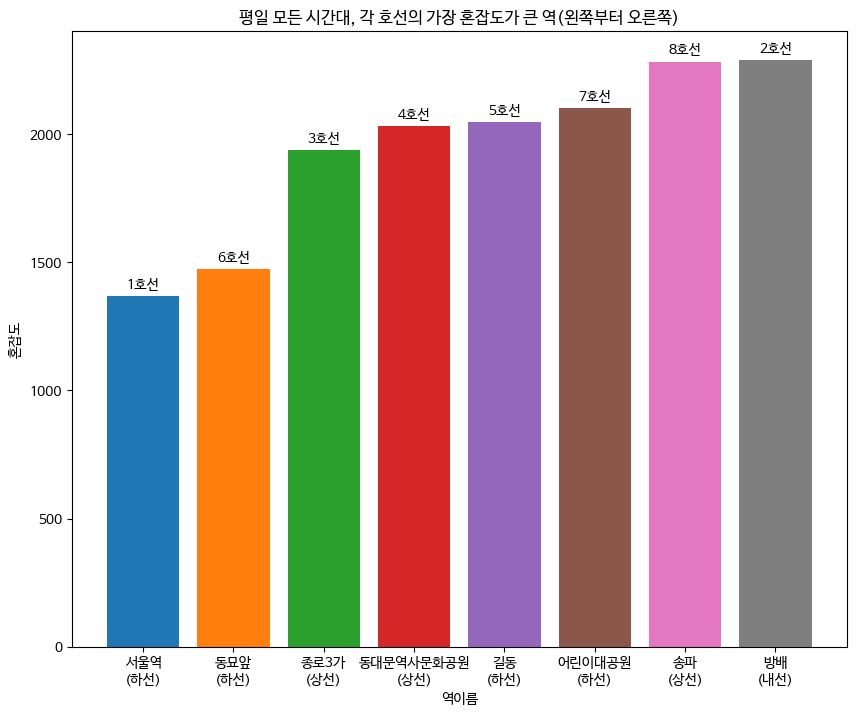

In [ ]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.figure(figsize=(10, 8))

# 행으로 데이터 가져오기 및 바 차트 그리기
for index in range(len(line_max)):
    row = line_max.iloc[index]
    x_label = f"{row['출발역']}\n({row['상하구분']})"
    plt.bar(x_label, row['합계'])

    # 바 위에 라벨 추가
    plt.text(index, row['합계'] + 30, f"{row['호선']}호선", ha='center', fontsize=10)

plt.title("평일 모든 시간대, 각 호선의 가장 혼잡도가 큰 역(왼쪽부터 오른쪽)")
plt.xlabel("역이름")
plt.ylabel("혼잡도")
plt.show()


**가장 혼잡도가 큰 호선 상위5개 **

# 2호선,8호선,7호선,5호선,4호선



출퇴근시간대의 혼잡도는 어덯게 될까??

가장 혼잡한 상위 5개를 출력해보자

In [ ]:
df2 = df.copy()

#기준

# 상선,하선등을 모두더한 혼잡도를 만들기 위해 호선, 출발역, 역번호를 기준으로 한 그룹 생성
#오전 7시~ 9시 그리고 17시부터 20시까지 더해서 출퇴근 혼잡도기준을 생성

df2 = df2.query('요일구분 == "평일"').groupby(['요일구분', '호선', '출발역', '상하구분'], as_index=False).sum()

df2['출퇴근혼잡도'] = df2['7시00분'] + df2['7시30분'] + df2['8시00분'] + df2['8시30분'] + df2['9시00분'] + df2['17시00분'] + df2['17시30분'] + df2['18시00분'] + df2['18시30분'] + df2['19시00분'] + df2['19시30분'] + df2['20시00분']
df2 = df2.sort_values(by='출퇴근혼잡도', ascending=False).head()
df2.sort_values(by='출퇴근혼잡도', inplace=True)
df2

,요일구분,호선,출발역,상하구분,역번호,5시30분,6시00분,6시30분,7시00분,7시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,합계,출퇴근혼잡도
536,평일,8,석촌,상선,2816,24.6,19.9,26.6,43.6,83.1,...,52.4,51.1,54.3,50.3,36.8,24.2,16.8,4.4,2175.9,973.1
516,평일,8,가락시장,상선,2818,26.2,21.6,29.9,48.7,88.2,...,51.7,46.6,46.0,47.9,32.0,21.5,11.6,2.3,2189.6,996.9
537,평일,8,석촌,하선,2816,32.2,44.8,57.5,72.9,94.4,...,49.0,55.6,59.8,61.7,44.9,35.0,14.2,10.3,2225.0,1002.5
538,평일,8,송파,상선,2817,28.3,22.9,31.3,52.4,97.3,...,51.8,46.7,46.8,47.8,32.3,21.3,15.7,3.9,2283.7,1039.8
76,평일,2,신도림,내선,9237,37.5,44.8,43.9,69.8,109.5,...,60.6,60.7,70.5,60.7,42.0,34.0,15.4,10.7,2790.9,1358.2


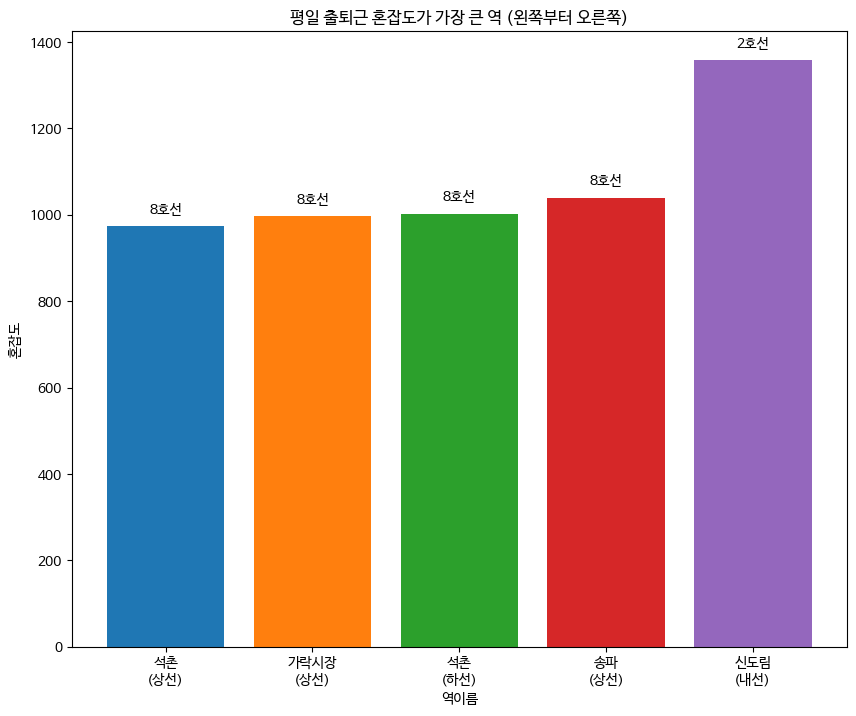

In [ ]:
#위에 결과를 차트로 표현해보자

plt.figure(figsize=(10, 8))

# 행으로 데이터 가져오기 및 차트 그리기
for index in range(len(df2)):
    row = df2.iloc[index]
    x_label = f"{row['출발역']}\n({row['상하구분']})"
    plt.bar(x_label, row['출퇴근혼잡도'])

    # 바 위에 라벨 추가
    plt.text(index, row['출퇴근혼잡도'] + 30, f"{row['호선']}호선", ha='center', fontsize=10)

plt.title("평일 출퇴근 혼잡도가 가장 큰 상위 5개 (왼쪽부터 오른쪽)")
plt.xlabel("역이름")
plt.ylabel("혼잡도")
plt.show()


**평일 기준, 출퇴근 시간때 혼잡도가 높은 상위 5개**

가락시장, 방배, 석촌, 송파, 신도림

** 석촌은 2호선과 관련이 있을꺼 같고 가락시장은 3호선과 관련*

2, 3, 8호선




**다음은 평일 기준 지하철 인원표에 따른 상위 5개의 역,
출퇴근시간때 인원이 많은 상위 5개의 역을 뽑아서
혼잡도와 비교 해보려고 합니다.**

그러기전에 날짜를 기준으로 9월n주차 평일/주말 인지 데이터를 구분하려고 합니다

In [ ]:
#데이터를 불러옴
인원표 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/서울교통공사 9월 30일까지의 역별 인원표.xlsx')
인원표.head()


,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,2024-09-01,1호선,150,서울역,승차,172,232,395,930,1363,...,2662,3031,2842,2791,2462,2562,1599,808,17,36655
1,2024-09-01,1호선,150,서울역,하차,178,793,1097,1392,1992,...,2548,2687,2232,2407,1859,1405,719,360,79,34276
2,2024-09-01,1호선,151,시청,승차,59,96,170,202,356,...,995,977,981,883,867,723,402,139,3,10798
3,2024-09-01,1호선,151,시청,하차,89,310,376,736,808,...,573,582,373,293,257,232,171,129,10,10141
4,2024-09-01,1호선,152,종각,승차,124,118,146,189,296,...,1313,1266,1403,1342,1286,1164,731,304,5,14923


In [ ]:
# '날짜' 컬럼을 datetime 형식으로 변환
인원표['날짜'] = pd.to_datetime(인원표['날짜'])

# 월별 첫 번째 날 기준으로 주차 계산
인원표['월'] = 인원표['날짜'].dt.month
인원표['일'] = 인원표['날짜'].dt.day

# 월의 첫 번째 날을 구하여 해당 주차를 계산
인원표['첫날'] = 인원표['날짜'].apply(lambda x: pd.Timestamp(f'{x.year}-{x.month:02d}-01'))

# 1일에서 주차를 계산 (1일부터 7일까지는 1주차, 8일부터 14일까지는 2주차 ...)
인원표['주차'] = ((인원표['날짜'] - 인원표['첫날']).dt.days // 7) + 1

# 주차를 '9월 1주차', '9월 2주차' 형태로 변환
인원표['주차_형식'] = 인원표['월'].astype(str) + "월 " + 인원표['주차'].astype(str) + "주차"

# 평일/주말 구분
인원표['요일'] = 인원표['날짜'].dt.weekday
인원표['평일/주말'] = 인원표['요일'].apply(lambda x: '평일' if x < 5 else '주말')

#필요없는 첫날, 주차, 요일 제거
인원표.drop(columns=['첫날', '주차', '요일', '월', '일'], inplace=True)

# 결과 출력
인원표.head()

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계,주차_형식,평일/주말
0,2024-09-01,1호선,150,서울역,승차,172,232,395,930,1363,...,2842,2791,2462,2562,1599,808,17,36655,9월 1주차,주말
1,2024-09-01,1호선,150,서울역,하차,178,793,1097,1392,1992,...,2232,2407,1859,1405,719,360,79,34276,9월 1주차,주말
2,2024-09-01,1호선,151,시청,승차,59,96,170,202,356,...,981,883,867,723,402,139,3,10798,9월 1주차,주말
3,2024-09-01,1호선,151,시청,하차,89,310,376,736,808,...,373,293,257,232,171,129,10,10141,9월 1주차,주말
4,2024-09-01,1호선,152,종각,승차,124,118,146,189,296,...,1403,1342,1286,1164,731,304,5,14923,9월 1주차,주말


In [ ]:
need_columns = [
    '06시 이전', '06 ~ 07', '07 ~ 08',
       '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14',
       '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20',
       '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후', '합 계']

# 승차,하차 구분을 없세고 다 더해서 합계를 계산
전체인원합 = 인원표.query('`평일/주말` == "평일"').groupby(['호선', '역번호', '역명'], as_index=False)[need_columns].sum()
전체인원합.sort_values(by='합 계', ascending=False)

각호선상위 = 전체인원합.groupby('호선', as_index=False)[['합 계']].max()
각호선상위

전체결과 = pd.DataFrame()

for index in range(len(각호선상위)):

  호선 = 각호선상위.iloc[index]['호선']
  합계 = 각호선상위.iloc[index]['합 계']

  전체결과 = pd.concat([전체결과, 전체인원합.query('호선 == @호선 and `합 계` == @합계')])

전체결과.sort_values(by='합 계', ascending=False, inplace=True)
전체결과

,호선,역번호,역명,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
31,2호선,222,강남,13458,59155,164525,306640,282863,145588,116132,...,184956,285581,380191,242500,157113,161659,139208,64645,16685,3273291
0,1호선,150,서울역,12266,50175,127555,256372,166487,99607,101598,...,138210,201450,245383,129624,89241,87485,56697,28484,7651,2244302
80,3호선,329,고속터미널,7168,30384,56447,91789,105107,102154,111729,...,147700,170989,174405,129722,118144,79471,55793,23542,5178,1921301
252,7호선,2748,가산디지털단지,9140,31744,146176,352622,196484,57656,40286,...,78517,198543,277355,116357,65299,47903,29714,15016,4020,1866705
109,4호선,424,명동,2501,20668,50787,122174,100662,71528,74005,...,109566,124540,155661,100061,82405,72790,60577,26732,4771,1522616
143,5호선,2534,광화문(세종문화회관),1951,27301,80197,246673,110314,51738,53330,...,75251,126097,209066,75626,54544,53823,33017,12343,2079,1438466
266,8호선,2819,문정,4456,15073,70928,176620,82460,32751,26710,...,43636,90669,132456,54910,35088,28507,23198,10337,3186,960143
192,6호선,2627,공덕,5878,16029,53853,109987,57439,30847,29263,...,44283,70403,102161,49415,34983,31901,25790,13956,4463,808115


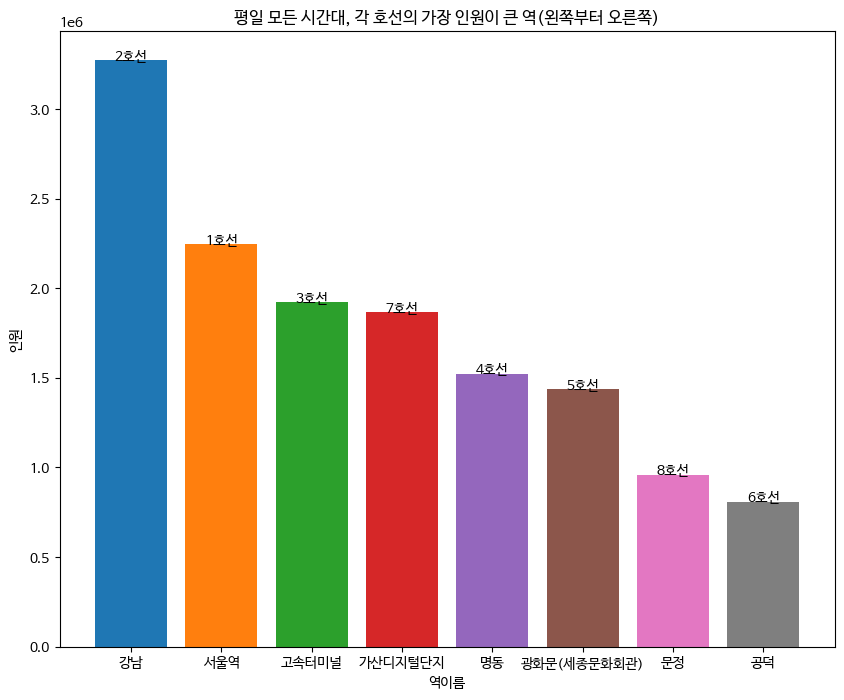

In [ ]:
plt.figure(figsize=(10, 8))

# 행으로 데이터 가져오기 및 바 차트 그리기
for index in range(len(전체결과)):
    row = 전체결과.iloc[index]
    x_label = f"{row['역명']}"
    plt.bar(x_label, row['합 계'])

    # 바 위에 라벨 추가
    plt.text(index, row['합 계'] + 30, f"{row['호선']}", ha='center', fontsize=10)

plt.title("평일 모든 시간대, 각 호선의 가장 인원이 큰 역(왼쪽부터 오른쪽)")
plt.xlabel("역이름")
plt.ylabel("인원")
plt.show()

평일을  기준으로 전체적인 지하철 인원의 합계를 구하고

통계를 내보았더니 2,8,7 호선이 나온 혼잡도와는 다르게

2,1,3호선이 나왔습니다

다음은 출퇴근 인원을 기준으로 상위 5개의 역을 뽑으려고 합니다

****

In [ ]:
평일출퇴근인원합 = 인원표.query("`평일/주말`=='평일'").groupby(['호선', '역번호', '역명'], as_index=False)

need_columns = ['07 ~ 08', '08 ~ 09', '17 ~ 18', '18 ~ 19', '19 ~ 20']

평일출퇴근인원합 = 평일출퇴근인원합[need_columns].sum()
평일출퇴근인원합['합 계'] = 평일출퇴근인원합[need_columns].sum(axis=1)

평일출퇴근인원합 = 평일출퇴근인원합.sort_values(by='합 계', ascending=False).head()

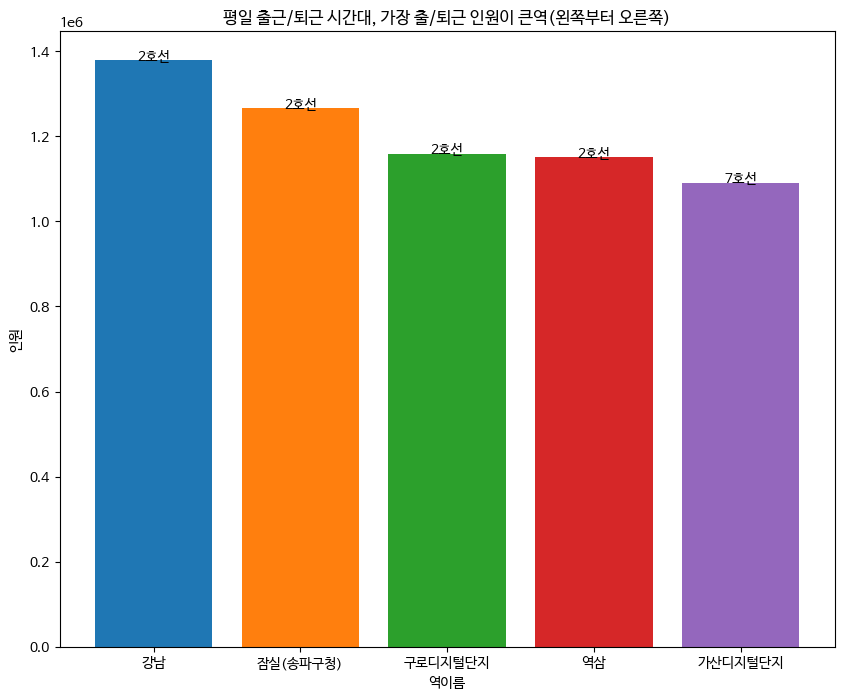

In [ ]:
plt.figure(figsize=(10, 8))

# 행으로 데이터 가져오기 및 바 차트 그리기
for index in range(len(평일출퇴근인원합)):
    row = 평일출퇴근인원합.iloc[index]
    x_label = f"{row['역명']}"
    plt.bar(x_label, row['합 계'])

    # 바 위에 라벨 추가
    plt.text(index, row['합 계'] + 30, f"{row['호선']}", ha='center', fontsize=10)

plt.title("평일 출근/퇴근 시간대, 가장 출/퇴근 인원이 큰역(왼쪽부터 오른쪽)")
plt.xlabel("역이름")
plt.ylabel("인원")
plt.show()

평일 출퇴근 시간대로 바뀌니 직장이 몰려있는
구로디지털단지, 가산디지털단지가 상위로 올라 왔습니다

****


#결론

**출퇴근 시간 기준으로 지하철 혼잡도, 그리고 인원표가 역은 다르지만 가장 많이 이용하는 호선과 혼잡한 노선으로 2호선을 가르켰습니다**

-


**어느정도의 상관관계는 가지지만 평일 모든 시간대의 혼잡도/인원에 대한 관련성이 좀 떨어지는점을 봐서 강력한 상관관계는 아니라는점을 알수 있었습니다**

-

**또한 차이 나는 이유는 혼잡도가 인원과 어느정도의 연관성이 있지만 지하철의 구조나 시간과도 연관이 있다고 생각합니다**





